In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## TEMEL VERİ ANALİZİ

In [2]:
df = pd.read_csv("/kaggle/input/ecommerce-data/data.csv",encoding = 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.shape

(541909, 8)

In [8]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [9]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [10]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [11]:
df.shape

(530104, 8)

## VERİ SETİNİ TANIMA

    Bu veri seti Birleşik Krallık merkezli ve kayıtlı bir online perakende mağazasının 01/12/2010 ile 09/12/2011 tarihleri arasında gerçekleşen tüm işlemlerini gösteren bir veri setidir. Şirketin birçok müşterisi toptancıdır.

## DEĞİŞKENLERİ TANIMA
    InvoiceNo: FATURA NUMARASI 
    StockCode: STOK NUMARASI
    Description: ÜRÜN AÇIKLAMASI
    Quantity: MİKTAR
    InvoiceDate: SATIŞ ADEDİ
    UnitPrice: ÜRÜN FİYATI
    CustomerID: MÜŞTERİ NUMARASI
    Country: SATIŞ YERİ

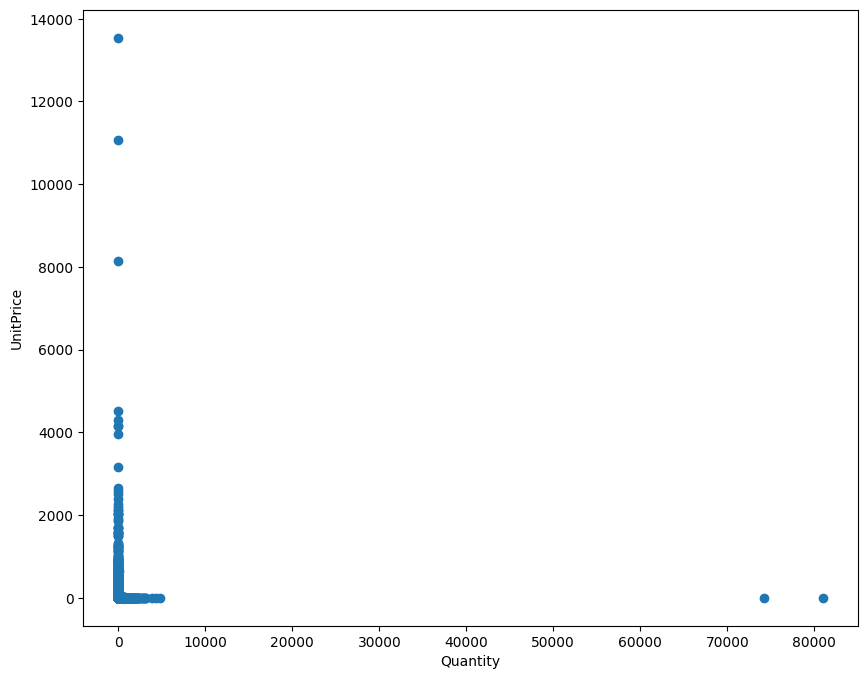

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Quantity'], df['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['Quantity','UnitPrice']]))
df = df[(z < 3).all(axis=1)]

In [14]:
df = df[(df['Quantity']>=0) | (df['UnitPrice']>=0)]

<Axes: >

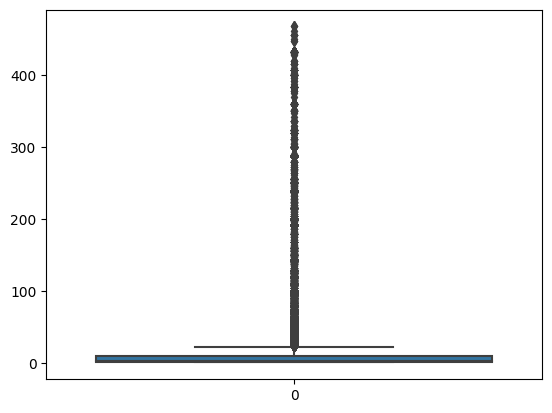

In [15]:
sns.boxplot(df['Quantity'])

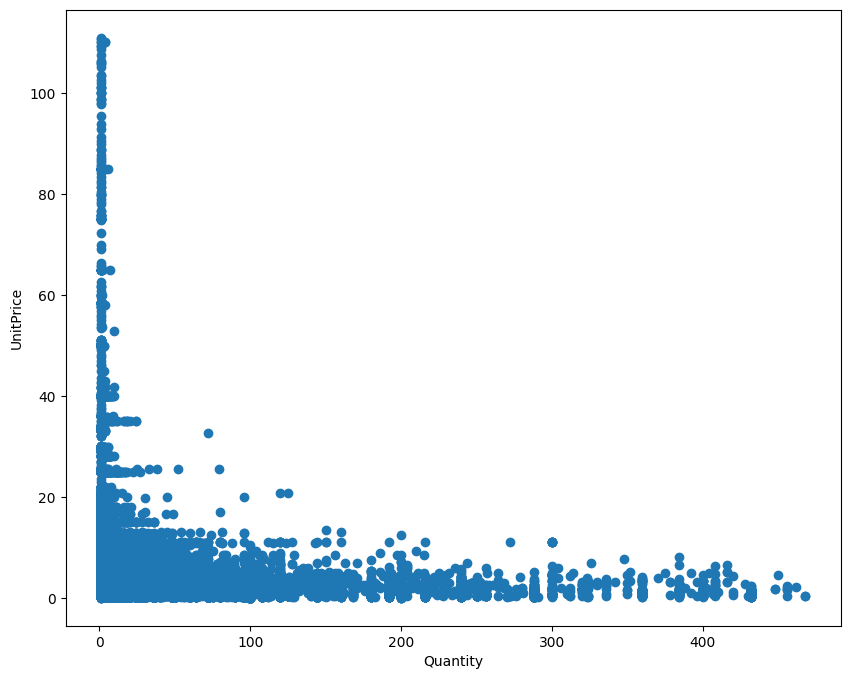

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Quantity'], df['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

## VERİ SETİNDEKİ NULL DEĞERLERİ ÖĞRENME

In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131611
Country             0
dtype: int64

## VERİ SETİNİ ZENGİNLEŞTİRMEK İÇİN BİR SÜTUN YARATMA

In [18]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

## VERİ SETİNDEKİ NULL DEĞERLERİN SAYISINI ARTTIRMA

In [19]:
import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:

    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [20]:
df = add_random_missing_values(df, 0.2)

In [21]:
df.isnull().sum()

InvoiceNo       96034
StockCode       95698
Description     95821
Quantity        95809
InvoiceDate     95981
UnitPrice       96307
CustomerID     203310
Country         96113
TotalAmount     95516
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528798 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    432764 non-null  object        
 1   StockCode    433100 non-null  object        
 2   Description  432977 non-null  object        
 3   Quantity     432989 non-null  float64       
 4   InvoiceDate  432817 non-null  datetime64[ns]
 5   UnitPrice    432491 non-null  float64       
 6   CustomerID   325488 non-null  float64       
 7   Country      432685 non-null  object        
 8   TotalAmount  433282 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 56.5+ MB


## VERİ SETİNDEKİ NULL DEĞERLERİ ORTLAMA VE MOD DEĞERLERİYLE DOLDURMA

In [23]:
df["InvoiceNo"].fillna(df["InvoiceNo"].mode()[0], inplace=True)

/tmp/ipykernel_30/4271488440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["InvoiceNo"].fillna(df["InvoiceNo"].mode()[0], inplace=True)


In [24]:
df["StockCode"].fillna(df["StockCode"].mode()[0], inplace=True)

/tmp/ipykernel_30/2117694038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["StockCode"].fillna(df["StockCode"].mode()[0], inplace=True)


In [25]:
df["Description"].fillna(df["Description"].mode()[0], inplace=True)

/tmp/ipykernel_30/1019234874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Description"].fillna(df["Description"].mode()[0], inplace=True)


In [26]:
df["Quantity"].fillna(df["Quantity"].mean(), inplace=True)

/tmp/ipykernel_30/477921103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quantity"].fillna(df["Quantity"].mean(), inplace=True)


In [27]:
df["InvoiceDate"].fillna(df["InvoiceDate"].mode()[0], inplace=True)

/tmp/ipykernel_30/233537097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["InvoiceDate"].fillna(df["InvoiceDate"].mode()[0], inplace=True)


In [28]:
df["UnitPrice"].fillna(df["UnitPrice"].mean(), inplace=True)

/tmp/ipykernel_30/3886259695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["UnitPrice"].fillna(df["UnitPrice"].mean(), inplace=True)


In [29]:
df["CustomerID"].fillna(df["CustomerID"].mode()[0], inplace=True)

/tmp/ipykernel_30/1437985844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CustomerID"].fillna(df["CustomerID"].mode()[0], inplace=True)


In [30]:
df["Country"].fillna(df["Country"].mode()[0], inplace=True)

/tmp/ipykernel_30/2746015319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Country"].fillna(df["Country"].mode()[0], inplace=True)


In [31]:
df["TotalAmount"].fillna(df["TotalAmount"].mean(), inplace=True)

/tmp/ipykernel_30/2170925041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalAmount"].fillna(df["TotalAmount"].mean(), inplace=True)


In [32]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [33]:
df['Hour']=df['InvoiceDate'].dt.hour
df['Month']=df['InvoiceDate'].dt.month
df['Weekdays']= df['InvoiceDate'].dt.weekday

## VERİ SETİNDEKİ MÜŞTERİ DAVRANIŞLARINI GÖRSEL VERİLERLE İNCELEME

In [34]:
rfm = df.copy()

In [35]:
ab = df.groupby('CustomerID').agg({'InvoiceDate': 'min','TotalAmount': 'sum'})
ab.rename(columns={'InvoiceDate': "Recency",('InvoiceDate', 'nunique'): "Frequency","TotalAmount": 'Monetization'},  inplace = True)
frequency = df.groupby('CustomerID').agg({'InvoiceDate':'nunique'})
frequency.rename(columns={'InvoiceDate': "Frequency"}, inplace = True)

rfm = pd.merge(ab,frequency, on='CustomerID')

In [36]:
a = rfm.reset_index()

In [37]:
rfm.rename(columns={'InvoiceDate': "Recency",'InvoiceDate': "Frequency","TotalAmount": 'Monetization'})

,Recency,Monetization,Frequency
CustomerID,,,
12347.0,2010-12-07 14:57:00,2966.891989,8
12348.0,2010-12-16 19:09:00,1144.184229,5
12349.0,2011-10-31 14:41:00,1249.607612,2
12350.0,2011-02-02 16:01:00,185.502537,2
12352.0,2011-02-16 12:33:00,1357.503532,8
...,...,...,...
18280.0,2011-03-07 09:52:00,142.250846,1
18281.0,2011-06-12 10:53:00,58.191691,2
18282.0,2011-08-05 13:35:00,148.502537,3


In [38]:
rfm.describe()

,Recency,Monetization,Frequency
count,4302,4.302000e+03,4302.000000
mean,2011-04-30 20:18:53.723849216,2.224940e+03,8.466527
min,2010-12-01 08:26:00,1.250000e+00,1.000000
25%,2011-01-18 08:47:45,2.608894e+02,2.000000
50%,2011-04-06 13:47:30,5.891713e+02,3.000000
75%,2011-08-22 13:54:15,1.376886e+03,5.000000
max,2011-12-08 13:11:00,3.162680e+06,14837.000000
std,NaN,4.848684e+04,226.244423


In [39]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 12347.0 to 18287.0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Recency       4302 non-null   datetime64[ns]
 1   Monetization  4302 non-null   float64       
 2   Frequency     4302 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 134.4 KB


In [40]:
rfm1 = rfm.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Hour,Month,Weekdays
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2011-10-31 14:41:00,2.550000,17850.0,United Kingdom,15.30,14,10,0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.390000,17850.0,United Kingdom,20.34,8,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.750000,17841.0,United Kingdom,22.00,8,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.297656,17850.0,United Kingdom,20.34,8,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.297656,17850.0,United Kingdom,20.34,8,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12.0,2011-12-09 12:50:00,3.297656,12680.0,United Kingdom,10.20,12,12,4
541905,581587,22899,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2011-10-31 14:41:00,2.100000,12680.0,France,12.60,14,10,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.150000,12680.0,United Kingdom,16.60,12,12,4
541907,581587,23255,WHITE HANGING HEART T-LIGHT HOLDER,4.0,2011-12-09 12:50:00,4.150000,17841.0,France,16.60,12,12,4


In [41]:
rfm['Rank_Recency'] = pd.qcut( rfm['Recency'],q=5, labels = range(6, 1, -1))
rfm['Rank_Recency'] = pd.to_numeric(rfm['Rank_Recency'])

In [42]:
def freq(x):
    if x ==1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else: 
        return 5

rfm['Rank_Frequency'] =rfm['Frequency'].apply(freq)

In [43]:
rfm['Rank_Monetization'] = pd.qcut( rfm['Monetization'],q=5, labels = range(1, 6, 1))
rfm['Rank_Monetization'] = pd.to_numeric(rfm['Rank_Monetization'])

rfm['RFM_Score'] = rfm['Rank_Recency'].astype(str)+ rfm['Rank_Frequency'].astype(str) + rfm['Rank_Monetization'].astype(str)
rfm['Score'] = rfm['Rank_Recency']+ rfm['Rank_Frequency']+ rfm['Rank_Monetization']

In [44]:
def client_segment(x):
    if x == 15:
        return 'Champions'
    elif  x >= 14:
        return 'Loyal Customers'
    elif  x >= 11:
        return 'Can’t Lose Them'
    elif  x >= 9:
        return 'Potential Loyalist'
    elif  x >= 7:
        return 'Promising'
    elif  x >= 6:
        return 'Needs Attention'
    elif  x >= 5:
        return 'At Risk'
    else:
        return 'Lost'

In [45]:
rfm['Clients'] = rfm['Score'].apply(client_segment)

In [46]:
clients = rfm[['Clients', 'Frequency', 'Monetization', 'Recency']].groupby('Clients').median()
clients.reset_index(inplace = True)

Text(0.5, 1.0, 'Median Visits')

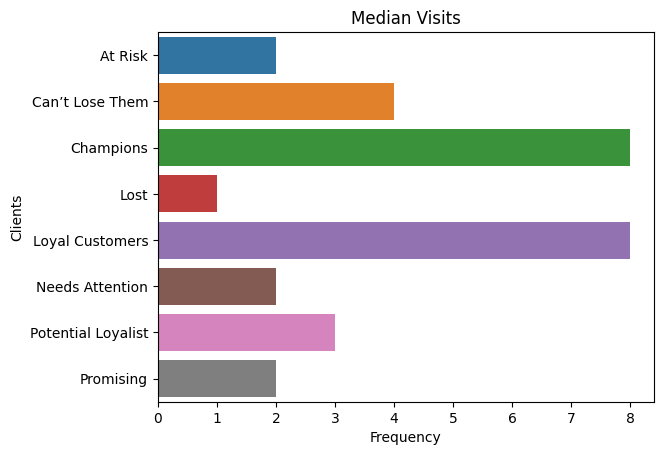

In [47]:
ax = sns.barplot(x="Frequency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Visits')

Text(0.5, 1.0, 'Median Expenditure')

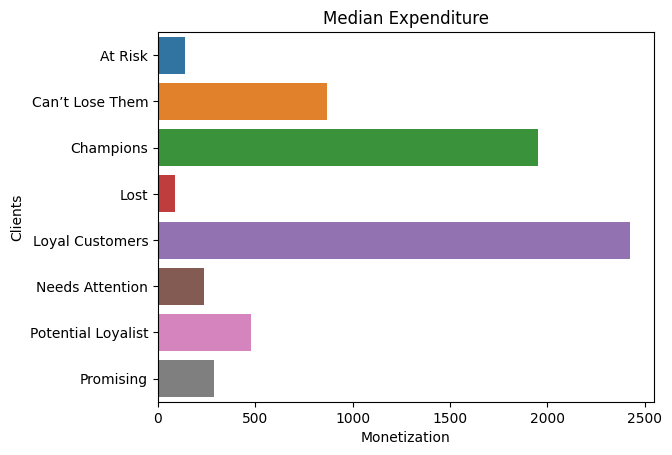

In [48]:
ax = sns.barplot(x="Monetization", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Expenditure')

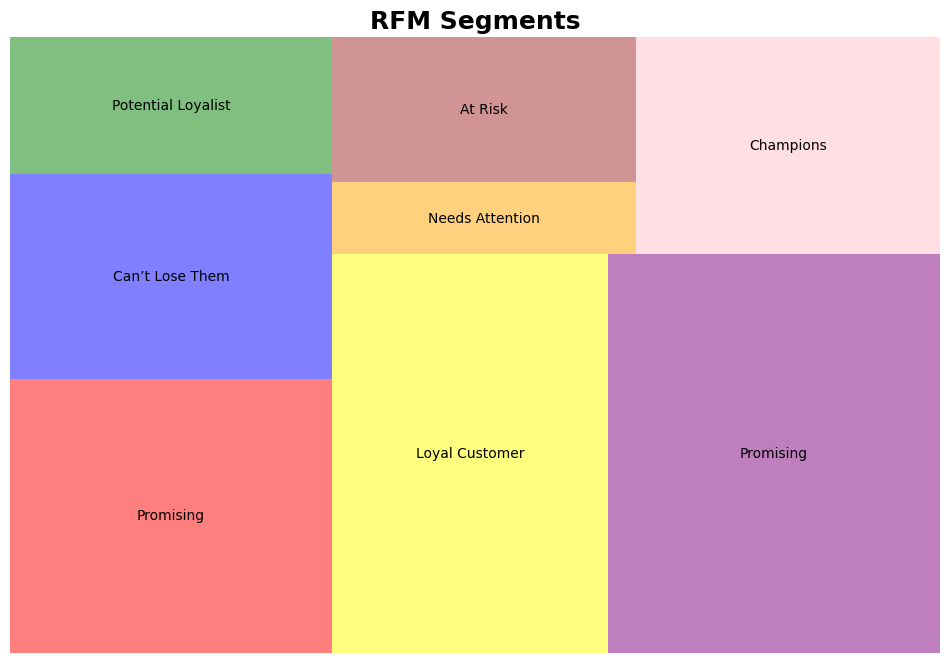

In [49]:
import squarify
import matplotlib.pyplot as plt

squarity = [20, 15, 10, 25, 30, 5, 10, 15]
color = ["red", "blue", "green", "yellow", "purple", "orange", "brown", "pink"]

label = [
    'Promising',
    'Can’t Lose Them',
    'Potential Loyalist',
    'Loyal Customer',
    'Promising', 
    'Needs Attention',
    'At Risk',
    'Champions',
]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
squarify.plot(sizes=squarity, label=label, color=color, alpha=0.5)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()


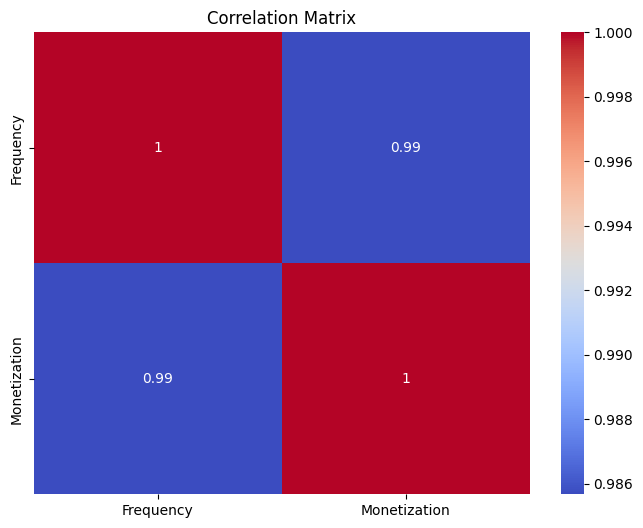

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_clients = clients.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_clients.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
